# Imports and Setup


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import os

# Load the pre-trained face cascade from OpenCV
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

!pip install opencv-python
!pip install matplotlib

# Webcam 1

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


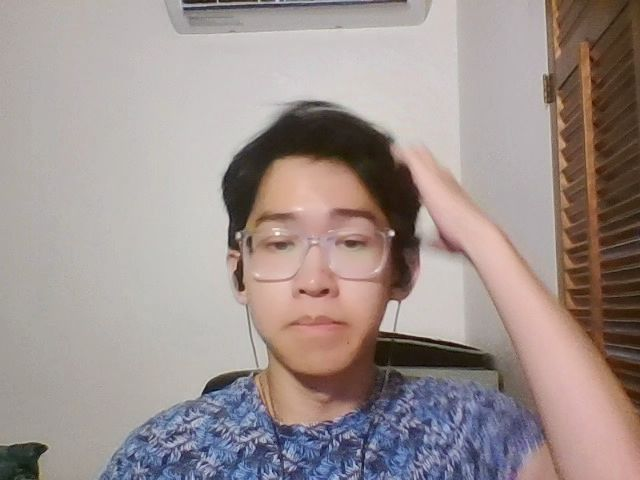

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

Saved to photo.jpg


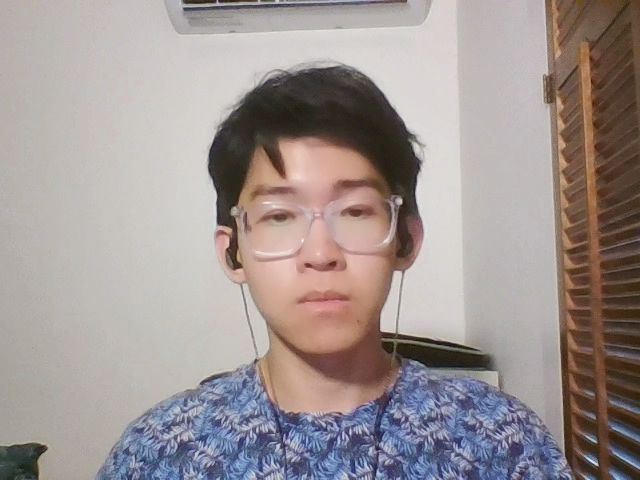

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# Webcam 2

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

#cap = cv2.VideoCapture(0)

path = filename
if os.path.exists(path):
  frame = cv2.imread(path)
  print("Path exists:", path)
  print("ABS File path:", os.path.abspath(path))


else:
  print("Path does not exist:", frame)

# Convert frame to grayscale for face detection
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale frame
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw a red rectangle around each detected face
for (x, y, w, h) in faces:
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255), 2)
print("Box drawn:", frame)


# Display the resulting frame
cv2.imshow('Frame', frame)

# Exit the loop if 'q' is pressed
if cv2.waitKey(1) & 0xFF == ord('q'):
    break

name 'take_photo' is not defined


NameError: ignored

In [ ]:
! wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki.tar.gz -P /content/drive/MyDrive/ColabNotebooks/OpenAvenues

In [ ]:
! tar -xvzf /content/drive/MyDrive/ColabNotebooks/OpenAvenues/wiki.tar.gz -C /content/drive/MyDrive/ColabNotebooks/OpenAvenues/data

In [ ]:
#/content/drive/MyDrive/ColabNotebooks/OpenAvenues/data/wiki (wiki path)

# HAAR Cascade on Webcam or Image

In [ ]:
from __future__ import print_function
import cv2 as cv
import argparse

import os

def detectAndDisplay(frame):
  frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
  frame_gray = cv.equalizeHist(frame_gray)

  #-- Detect faces
  faces = face_cascade.detectMultiScale(frame_gray)
  for (x,y,w,h) in faces:
    center = (x + w//2, y + h//2)
    frame = cv.ellipse(frame, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)

    faceROI = frame_gray[y:y+h,x:x+w]
    #-- In each face, detect eyes
    eyes = eyes_cascade.detectMultiScale(faceROI)
    for (x2,y2,w2,h2) in eyes:
      eye_center = (x + x2 + w2//2, y + y2 + h2//2)
      radius = int(round((w2 + h2)*0.25))
      frame = cv.circle(frame, eye_center, radius, (255, 0, 0 ), 4)

    cv.imshow('Capture - Face detection', frame)

parser = argparse.ArgumentParser(description='Code for Cascade Classifier tutorial.')
parser.add_argument('--face_cascade', type=str, help='Path to face cascade.', default='/content/drive/MyDrive/Internships/ParkerDewey/haarcascade_frontalface_alt.xml')
parser.add_argument('--eyes_cascade', type=str, help='Path to eyes cascade.', default='/content/drive/MyDrive/Internships/ParkerDewey/haarcascade_eye_tree_eyeglasses.xml')
parser.add_argument('--camera', help='Camera divide number.', type=int, default=0)
parser.add_argument('folder_path', type=str, help='Path to the local folder containing images.', default='/content/drive/MyDrive/ColabNotebooks/OpenAvenues/data/wiki/00/')


args, unknown = parser.parse_known_args()

face_cascade_name = args.face_cascade
eyes_cascade_name = args.eyes_cascade

face_cascade = cv.CascadeClassifier()
eyes_cascade = cv.CascadeClassifier()

#-- 1. Load the cascades
if not face_cascade.load(cv.samples.findFile(face_cascade_name)):
  print('--(!)Error loading face cascade')
  exit(0)
if not eyes_cascade.load(cv.samples.findFile(eyes_cascade_name)):
  print('--(!)Error loading eyes cascade')
  exit(0)

print("ABS File path:", os.path.abspath(args.folder_path))

folder_path = args.folder_path
image_files = os.listdir(folder_path)


for file_name in image_files:
    file_path = os.path.join(folder_path, file_name)
    image = cv2.imread(file_path)
    # Process the image as needed
    detectAndDisplay(image)


camera_device = args.camera
#-- 2. Read the video stream
cap = cv.VideoCapture(camera_device)
if not cap.isOpened:
  print('--(!)Error opening video capture')
  exit(0)

while True:
  ret, frame = cap.read()
  if frame is None:
    print('--(!) No captured frame -- Break!')
    break
  detectAndDisplay(frame)
  if cv.waitKey(10) == 27:
    break

ABS File path: /root/.local/share/jupyter/runtime/kernel-54bfc3fe-020b-435e-abca-b1ecc8acac57.json


NotADirectoryError: ignored

Mapping metedata to images

In [ ]:
import scipy.io
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
import numpy.core.multiarray
from backcall.backcall import PY3

#Matlab wiki file path: /content/drive/MyDrive/ColabNotebooks/OpenAvenues/data/wiki/wiki.mat

# Load the .mat file
data = scipy.io.loadmat('/content/drive/MyDrive/ColabNotebooks/OpenAvenues/data/wiki/wiki.mat')

wiki = data['wiki'][0][0]

i=7
filename = wiki[2][0][i][0]
ground = wiki[5][0][i]

ground_img = cv2.imread("/content/drive/MyDrive/ColabNotebooks/OpenAvenues/data/wiki" + filename)
p1 = ground[0][0]
p2 = ground [0][1]
p3 = ground[0][2]
p4 = ground[0][3]
cv2.rectangle(ground_img, (int(p1), int(p2)), (int(p3), int(p4)), (0, 0, 255), 2)
hcp1 =
print("Ground = ( " + str(int(p1)) + " , " + str(int(p2)) + " ) , " + "( " + str(int(p3)) + ", " + str(int(p4)) + " )\n")

cascade_img = cv2.imread("/content/drive/MyDrive/ColabNotebooks/OpenAvenues/data/wiki" + filename)
gray = cv2.cvtColor(cascade_img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcasacdes + 'haarcascade_frontalface_default.xml'))
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

num_faces = 0;
for (x, y, w, h) in faces:
    num_faces += 1
    cv2.rectangle(cascade_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    print("HAAR Cascade = ( " + str(x) + " , " + str(y) + " ) , " + "( " + str(x + w) + " , " + str(y + h) + " )\n")

if num_faces == 1:
  print("Offset = (", abs(int(p1)-x), ",", abs(int(p2)-y), ") ,", "(", abs(int(p3)-(x+w)), ",", abs(int(p4)-(y+h)), ")\n")

display = np.hstack((ground_img, cascade_img))
cv2_imshow(display)


#new


# import the necessary packages
from collections import namedtuple
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

image_path = cv2.imread("/content/drive/MyDrive/ColabNotebooks/OpenAvenues/data/wiki" + filename)


# define the `Detection` object
Detection = namedtuple("Detection", ["image_path", "gt", "pred"])

def bb_intersection_over_union(boxA, boxB):
  # determine the (x, y)-coordinates of the intersection rectangle
  xA = max(boxA[0], boxB[0])
  yA = max(boxA[1], boxB[1])
  xB = min(boxA[2], boxB[2])
  yB = min(boxA[3], boxB[3])

  # compute the area of intersection rectangle
  interArea = (xB - xA) * (yB - yA)

  # compute the area of both the prediction and ground-truth
  # rectangles
  boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
  boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

  # compute the intersection over union by taking the intersection
  # area and dividing it by the sum of prediction + ground-truth
  # areas - the interesection area
  iou = interArea / float(boxAArea + boxBArea - interArea)

  # return the intersection over union value
  return iou

  # define the list of example detections


examples = [
  Detection(image_path, [39, 63, 203, 112], [p1, p2, p3, p4]),]


# loop over the example detections
for detection in examples:
  # load the image
  image = cv2.imread(detection.image_path)
  # draw the ground-truth bounding box along with the predicted
  # bounding box
  cv2.rectangle(image, tuple(detection.gt[:2]),
    tuple(detection.gt[2:]), (0, 255, 0), 2)
  cv2.rectangle(image, tuple(detection.pred[:2]),
    tuple(detection.pred[2:]), (0, 0, 255), 2)
  # compute the intersection over union and display it
  iou = bb_intersection_over_union(detection.gt, detection.pred)
  cv2.putText(image, "IoU: {:.4f}".format(iou), (10, 30),
    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
  print("{}: {:.4f}".format(detection.image_path, iou))
  # show the output image
  #cv2.imshow("Image", image)
  cv2_imshow(image)
  cv2.waitKey(0)

Ground = ( 152 , 95 ) , ( 323, 266 )



error: ignored

Calculating Intersection over Union (Static)

In [ ]:
# import the necessary packages
from collections import namedtuple
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

image_path = "/content/drive/MyDrive/ColabNotebooks/OpenAvenues/iou_result_01.webp"


# define the `Detection` object
Detection = namedtuple("Detection", ["image_path", "gt", "pred"])

def bb_intersection_over_union(boxA, boxB):
  # determine the (x, y)-coordinates of the intersection rectangle
  xA = max(boxA[0], boxB[0])
  yA = max(boxA[1], boxB[1])
  xB = min(boxA[2], boxB[2])
  yB = min(boxA[3], boxB[3])

  # compute the area of intersection rectangle
  interArea = (xB - xA) * (yB - yA)

  # compute the area of both the prediction and ground-truth
  # rectangles
  boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
  boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])

  # compute the intersection over union by taking the intersection
  # area and dividing it by the sum of prediction + ground-truth
  # areas - the interesection area
  iou = interArea / float(boxAArea + boxBArea - interArea)

  # return the intersection over union value
  return iou

  # define the list of example detections


examples = [
  Detection("image_0002.jpg", [39, 63, 203, 112], [54, 66, 198, 114]),
  Detection("image_0016.jpg", [49, 75, 203, 125], [42, 78, 186, 126]),
  Detection("image_0075.jpg", [31, 69, 201, 125], [18, 63, 235, 135]),
  Detection("image_0090.jpg", [50, 72, 197, 121], [54, 72, 198, 120]),
  Detection("image_0120.jpg", [35, 51, 196, 110], [36, 60, 180, 108])]


# loop over the example detections
for detection in examples:
  # load the image
  image = cv2.imread(detection.image_path)
  # draw the ground-truth bounding box along with the predicted
  # bounding box
  cv2.rectangle(image, tuple(detection.gt[:2]),
    tuple(detection.gt[2:]), (0, 255, 0), 2)
  cv2.rectangle(image, tuple(detection.pred[:2]),
    tuple(detection.pred[2:]), (0, 0, 255), 2)
  # compute the intersection over union and display it
  iou = bb_intersection_over_union(detection.gt, detection.pred)
  cv2.putText(image, "IoU: {:.4f}".format(iou), (10, 30),
    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
  print("{}: {:.4f}".format(detection.image_path, iou))
  # show the output image
  #cv2.imshow("Image", image)
  cv2_imshow(image)
  cv2.waitKey(0)

image_0002.jpg: 0.7958


AttributeError: ignored

Faces into Buckets

In [ ]:
! wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar -P /content/drive/MyDrive/ColabNotebooks/OpenAvenues

--2023-07-19 20:35:58--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki_crop.tar
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 811315200 (774M) [application/x-tar]
Saving to: ‘/content/drive/MyDrive/ColabNotebooks/OpenAvenues/wiki_crop.tar’

wiki_crop.tar       100%[===================>] 773.73M  30.0MB/s    in 27s     

2023-07-19 20:36:25 (28.3 MB/s) - ‘/content/drive/MyDrive/ColabNotebooks/OpenAvenues/wiki_crop.tar’ saved [811315200/811315200]



In [ ]:
! tar -xvf /content/drive/MyDrive/ColabNotebooks/OpenAvenues/wiki_crop.tar -C /content/drive/MyDrive/ColabNotebooks/OpenAvenues/data/cropfacedata

Streaming output truncated to the last 5000 lines.
wiki_crop/92/30943192_1890-04-19_1954.jpg
wiki_crop/92/30949092_1943-11-23_1968.jpg
wiki_crop/92/30991792_1921-11-16_1954.jpg
wiki_crop/92/4096292_1970-02-17_2006.jpg
wiki_crop/92/709692_1958-05-03_2011.jpg
wiki_crop/92/909392_1959-02-09_2014.jpg
wiki_crop/92/11942292_1980-02-25_2009.jpg
wiki_crop/92/11955692_1955-09-10_1977.jpg
wiki_crop/92/2194592_1963-09-28_2007.jpg
wiki_crop/92/31935592_1931-08-31_1967.jpg
wiki_crop/92/31959792_1959-04-16_1984.jpg
wiki_crop/92/3196992_1977-07-08_2012.jpg
wiki_crop/92/41970292_1997-05-26_2012.jpg
wiki_crop/92/5194492_1983-04-02_2014.jpg
wiki_crop/92/1290492_1942-12-20_1997.jpg
wiki_crop/92/22989292_1983-07-01_2014.jpg
wiki_crop/92/32944792_1990-12-24_2013.jpg
wiki_crop/92/7297492_1980-07-12_2013.jpg
wiki_crop/92/13937192_1890-12-12_1970.jpg
wiki_crop/92/1399192_1967-12-06_2009.jpg
wiki_crop/92/2398292_1979-08-12_2011.jpg
wiki_crop/92/33928292_1982-02-14_2011.jpg
wiki_crop/92/149692_1973-07-15_2006.j

In [ ]:
import scipy.io
import cv2
import numpy as np


from datetime import datetime, timedelta
from google.colab.patches import cv2_imshow
import numpy.core.multiarray
from backcall.backcall import PY3

import matplotlib.pyplot as plt

#Matlab wiki file path: /content/drive/MyDrive/ColabNotebooks/OpenAvenues/data/cropfacedata/wiki_crop/wiki.mat
#Number of wikipedia faces: 62328

# Load the .mat file
face_data = scipy.io.loadmat('/content/drive/MyDrive/ColabNotebooks/OpenAvenues/data/cropfacedata/wiki_crop/wiki.mat')

wiki = face_data['wiki'][0][0]
print(wiki.shape)

bucket_0_13 = []
bucket_14_20 = []
bucket_21_40 = []
bucket_41_60 = []
bucket_61_100 = []

for i in range(62328):
  filename = wiki[2][0][i][0]
  #print(filename, " 1")
  birth_year = wiki[0][0][i]
  #print(birth_year, " 2")

  n_birth_year = datetime.fromordinal(int(birth_year)) + timedelta(days=int(birth_year)%1) - timedelta(days = 366)
  nn_birth_year = n_birth_year.strftime("%Y")
  #print(nn_birth_year, "3")

  photo_taken = wiki[1][0][i]
  #print(photo_taken, " 4")
  age_at_photo = int(photo_taken) - int(nn_birth_year)
  #print(age_at_photo, " 5")

  if (age_at_photo <= 13):
    bucket_0_13.append(filename)
  elif (age_at_photo <= 20):
    bucket_14_20.append(filename)
  elif (age_at_photo <= 40):
    bucket_21_40.append(filename)
  elif (age_at_photo <= 60):
    bucket_41_60.append(filename)
  else:
    bucket_61_100.append(filename)

print(len(bucket_0_13))
print(len(bucket_14_20))
print(len(bucket_21_40))
print(len(bucket_41_60))
print(len(bucket_61_100))

combined_list = [len(bucket_0_13), len(bucket_14_20), len(bucket_21_40), len(bucket_41_60), len(bucket_61_100)]
print(combined_list)


()
1729
4536
35774
12957
7332
[1729, 4536, 35774, 12957, 7332]


# Process, SIFT, Binary classifier, Accuracy metrics

In [ ]:
import scipy.io
from datetime import datetime, timedelta

# Load the .mat file
face_data = scipy.io.loadmat('/content/drive/MyDrive/ColabNotebooks/OpenAvenues/data/cropfacedata/wiki_crop/wiki.mat')

wiki = face_data['wiki'][0][0]
print(wiki.shape)

bucket_0_50 = []
bucket_51_100 = []

for i in range(62328):
    filename = wiki[2][0][i][0]
    birth_year = wiki[0][0][i]
    n_birth_year = datetime.fromordinal(int(birth_year)) + timedelta(days=int(birth_year) % 1) - timedelta(days=366)
    nn_birth_year = n_birth_year.strftime("%Y")
    photo_taken = wiki[1][0][i]
    age_at_photo = int(photo_taken) - int(nn_birth_year)

    if age_at_photo <= 50:
        bucket_0_50.append(filename)
    else:
        bucket_51_100.append(filename)

print(len(bucket_0_50))
print(len(bucket_51_100))

combined_list = [len(bucket_0_50), len(bucket_51_100)]
print(combined_list)

()
49460
12868
[49460, 12868]


In [ ]:
#0-80th percentile index = 0-49862 (Training Data)
#81st-99th percentile index = 49863-62328 (Testing Data)

import numpy as np
import cv2 as cv

# Load the .mat file
face_data = scipy.io.loadmat('/content/drive/MyDrive/ColabNotebooks/OpenAvenues/data/cropfacedata/wiki_crop/wiki.mat')

wiki = face_data['wiki'][0][0]
print(wiki.shape)

# Loop for training data (0-49862)
for i in range(49863):
    filename = wiki[2][0][i][0]
    birth_year = wiki[0][0][i]
    n_birth_year = datetime.fromordinal(int(birth_year)) + timedelta(days=int(birth_year) % 1) - timedelta(days=366)
    nn_birth_year = n_birth_year.strftime("%Y")
    photo_taken = wiki[1][0][i]
    age_at_photo = int(photo_taken) - int(nn_birth_year)

    print(filename)

    img = cv.imread('/content/drive/MyDrive/ColabNotebooks/OpenAvenues/data/cropfacedata/wiki_crop/' + filename)

    gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)

    sift = cv.SIFT_create()
    kp = sift.detect(gray,None)

    img_with_keypoints = cv.drawKeypoints(gray, kp, img)

    cv.imwrite('sift_keypoints_train_{:05d}.jpg'.format(i), img_with_keypoints)

# Loop for testing data (49863-62328)
for i in range(49863, 62329):
    filename = wiki[2][0][i][0]
    birth_year = wiki[0][0][i]
    n_birth_year = datetime.fromordinal(int(birth_year)) + timedelta(days=int(birth_year) % 1) - timedelta(days=366)
    nn_birth_year = n_birth_year.strftime("%Y")
    photo_taken = wiki[1][0][i]
    age_at_photo = int(photo_taken) - int(nn_birth_year)

    print(filename)

    img = cv.imread('/content/drive/MyDrive/ColabNotebooks/OpenAvenues/data/cropfacedata/wiki_crop/' + filename)

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    sift = cv.SIFT_create()
    kp = sift.detect(gray, None)

    img_with_keypoints = cv.drawKeypoints(gray, kp, img)

    cv.imwrite('sift_keypoints_test_{:05d}.jpg'.format(i), img_with_keypoints)

()
17/10000217_1981-05-05_2009.jpg
48/10000548_1925-04-04_1964.jpg
12/100012_1948-07-03_2008.jpg
65/10001965_1930-05-23_1961.jpg
16/10002116_1971-05-31_2012.jpg
02/10002702_1960-11-09_2012.jpg
41/10003541_1937-09-27_1971.jpg
39/100039_1904-12-07_1982.jpg
13/10004113_1946-08-26_2007.jpg
22/10004122_1982-03-17_2011.jpg
99/10004299_1908-08-19_1950.jpg
56/1000456_1933-06-12_1969.jpg
82/10004882_1987-05-16_2010.jpg
22/1000522_1931-01-15_1959.jpg
61/10005261_1936-06-24_1974.jpg
47/10005947_1981-04-07_2006.jpg
84/1000684_1972-04-05_2004.jpg
50/10006850_1973-08-17_2010.jpg
77/10007577_1988-06-16_2007.jpg
81/1000781_1930-07-07_2008.jpg
87/100087_1889-05-19_1940.jpg
97/100097_1968-03-23_2010.jpg
91/1001191_1980-11-08_2011.jpg
31/1001231_1981-01-30_2014.jpg
32/10012532_1983-03-30_2011.jpg


KeyboardInterrupt: ignored

# Final Binary Age Classifier: 0-50 or 51-100

In [8]:
import scipy.io
import cv2
import numpy as np
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the .mat file
face_data = scipy.io.loadmat('/content/drive/MyDrive/ColabNotebooks/OpenAvenues/data/cropfacedata/wiki_crop/wiki.mat')

wiki = face_data['wiki'][0][0]

# Step 1: Process and split faces dataset into train and test (80-20 split)
images = []
labels = []

#62328
for i in range(62328):
    filename = wiki[2][0][i][0]
    birth_year = wiki[0][0][i]
    n_birth_year = datetime.fromordinal(int(birth_year)) + timedelta(days=int(birth_year) % 1) - timedelta(days=366)
    nn_birth_year = n_birth_year.strftime("%Y")
    photo_taken = wiki[1][0][i]
    age_at_photo = int(photo_taken) - int(nn_birth_year)

    img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/OpenAvenues/data/cropfacedata/wiki_crop/' + filename, cv2.IMREAD_GRAYSCALE)

    # Step 2: Feature extraction using SIFT
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(img, None)

    # If there are fewer than 2048 keypoints, we pad the descriptor array with zeros
    if des is None:
        des = np.zeros((2048, 128))
    elif des.shape[0] < 2048:
        des = np.concatenate((des, np.zeros((2048 - des.shape[0], 128))))
    elif des.shape[0] > 2048:
        des = des[:2048, :]

    # Flatten the descriptor array to get a 1D feature vector
    feature_vector = des.flatten()
    feature_vector.reshape(-1, 1)

    # print(np.shape(feature_vector), " 1")
    images.append(feature_vector)
    # print(np.shape(images), " 2")

    # Step 3: Assign binary labels (0 for age 0-50, 1 for age 51-100)
    label = 0 if age_at_photo <= 50 else 1
    labels.append(label)

    # print(np.shape(labels), " 3")

    # print(i, " 4")

print(np.shape(images))
print("Loop Finished")

# Step 4: Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
print(np.shape(X_train))

print("Dataset Split")

# Step 5: Train a logistic regression classifier
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train, y_train)

print("Binary Classifier")

# Step 6: Get accuracy metrics on the test split
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))

(800, 262144)
Loop Finished
(640, 262144)
Dataset Split
Binary Classifier
Accuracy: 77.50%


In [6]:
count = 0
for e in X_train:
    # print(np.shape(e))
    count += 1
    #print(len(e))
    if len(e) != 262144:
      print(count)
      print(len(e))

# Training Experiment Notes


1.   Wiki birth dates are in special matlab format, used datetime object to convert to integer year
2.   Some images do not have SIFT des, results in NONE error. Fixed by padding. Inital padding if des was NONE was from np.zeroes(1, 128) which resulted in an error because the elif resulted in a numpy array f rom (2048, 128) instead. The np had to be the same size.
3. Feature vector need to be reshaped with .reshape(-1, 1)
4. For unknown reasons the np arrays end with commas and blanks (#, )



401 - 76.25% accuracy

8000 - 77.50% accuracy
